In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
dataset = pd.read_csv("../input/data.csv")

## Splitting the dataset into dependent and independent variable

In [3]:
#y//dependen variable
#x//independent variable
y=dataset["diagnosis"]


In [4]:
dataset.shape

(569, 33)

In [5]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
x=dataset.iloc[:,2:-1].values

In [7]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])


## Visualize the data

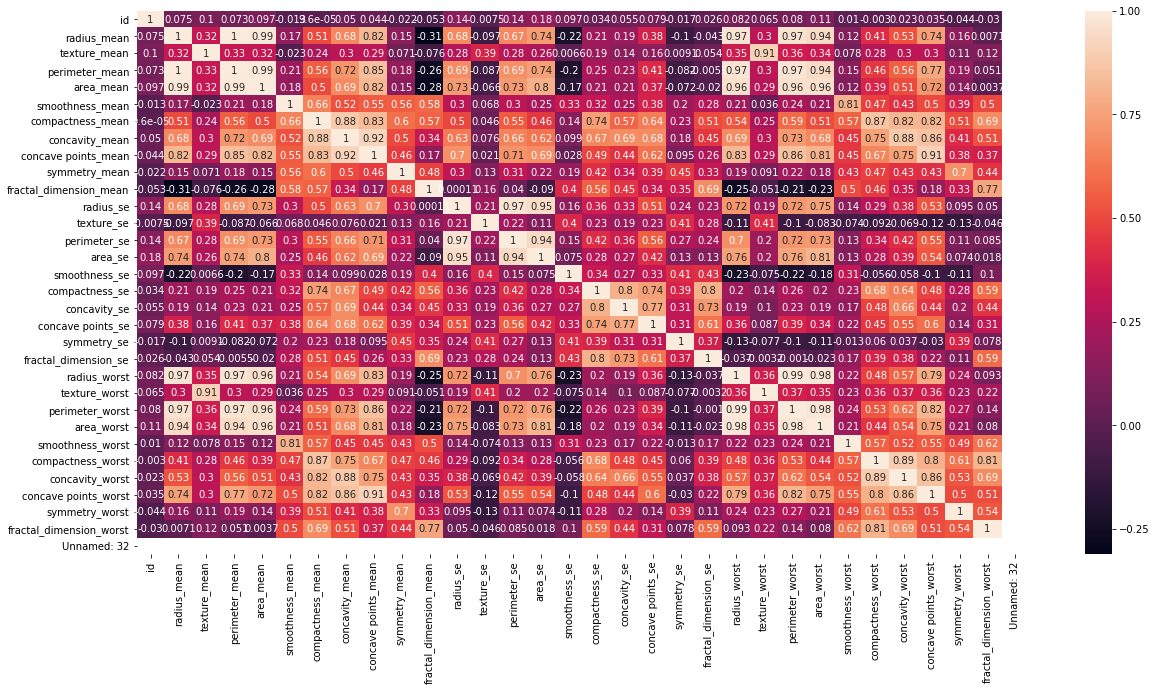

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)

## Categorical data

In [9]:
#diagnosis
from sklearn.preprocessing import LabelEncoder

In [10]:
y_label_encoder = LabelEncoder()
y=y_label_encoder.fit_transform(y)

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Splitting the dataset into training and test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

## Fitting the model into the dataset

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
classifier = SVC(kernel="linear",random_state=5)

In [17]:
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=5,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = classifier.predict(x_test)

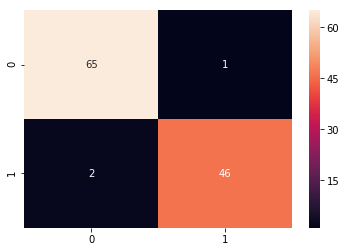

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
classifier1 = RandomForestClassifier(n_estimators=10,criterion = "entropy",random_state = 0)

In [23]:
classifier1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred1 = classifier1.predict(x_test)

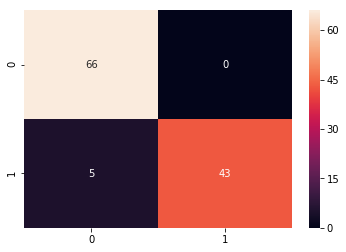

In [25]:
cm1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True)

In [26]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Bayes Theorem

In [27]:
from sklearn.naive_bayes import GaussianNB

In [29]:
classifier2 = GaussianNB()
classifier2.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
y_pred2 = classifier2.predict(x_test)

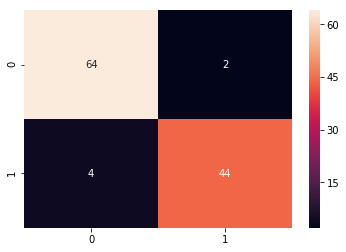

In [35]:
cm2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2,annot=True)

In [37]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.96      0.92      0.94        48

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

